<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
'''5. Number of Instances: 306

    6. Number of Attributes: 4 (including the class attribute)
    7. Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year'''

"7. Attribute Information:\n   1. Age of patient at time of operation (numerical)\n   2. Patient's year of operation (year - 1900, numerical)\n   3. Number of positive axillary nodes detected (numerical)\n   4. Survival status (class attribute)\n         1 = the patient survived 5 years or longer\n         2 = the patient died within 5 year"

In [16]:
cols = ['age','op_year','nodes','survived']
df.columns=cols
df.head()

,age,op_year,nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
#there are supposed to be 4 attributes and 306 rows.  will use .shape to check that
df.shape

(306, 4)

In [9]:
#checking for Nans/Null
df.isna().sum(), df.isnull().sum()

(Age         0
 op_year     0
 nodes       0
 survival    0
 dtype: int64, Age         0
 op_year     0
 nodes       0
 survival    0
 dtype: int64)

In [0]:
#changing the survival columns - 0 for not surviving and 1 for surviving >5 years (0/1 is a more 
df['survived']= np.where(df['survived']==1,1,0)


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

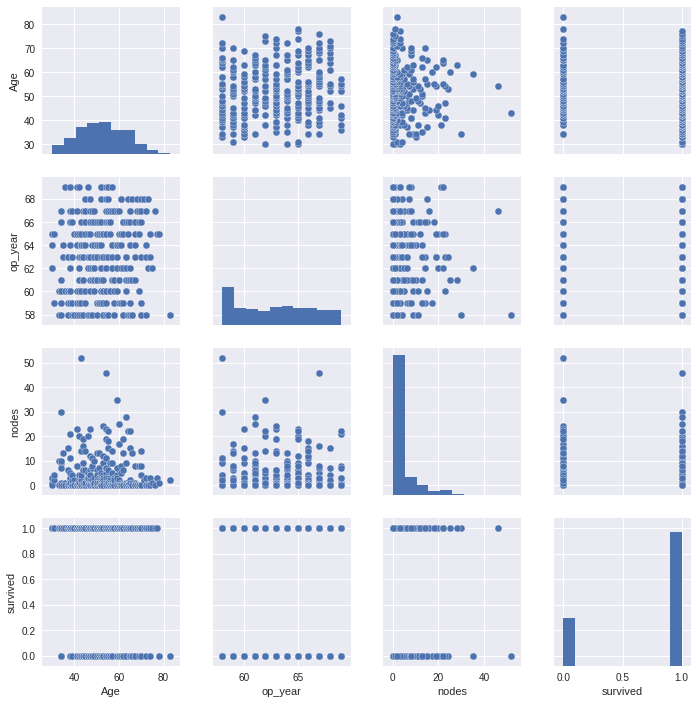

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
#using pairplot to see if there are any obvious correlations
g = sns.pairplot(df)

In [0]:
#nothing springs out so binning data
age_bin = pd.cut(df['age'], 10)  # 5 equal-sized bins
opyr_bin = pd.cut(df['op_year'], 10)  
nodes_bin = pd.cut(df['nodes'], 10) 

In [35]:
#making cross tab - didn't help me!
ct = pd.crosstab(opyr_bin,[age_bin,df['survived']],
                  rownames=['op yr'],colnames=['age','survived'])
ct.head()

age            (29.947, 35.3]    (35.3, 40.6]    (40.6, 45.9]    (45.9, 51.2]  \
survived                    0  1            0  1            0  1            0   
op yr                                                                           
(57.989, 59.1]              1  3            0  7            4  6            5   
(59.1, 60.2]                0  3            0  6            1  3            0   
(60.2, 61.3]                0  1            0  0            0  3            0   
(61.3, 62.4]                0  1            0  1            0  1            2   
(62.4, 63.5]                0  1            0  4            1  4            3   

age               (51.2, 56.5]    (56.5, 61.8]    (61.8, 67.1]     \
survived        1            0  1            0  1            0  1   
op yr                                                               
(57.989, 59.1]  6            3  6            1  6            4  6   
(59.1, 60.2]    2            2  7            0  2            1  0   
(60.2, 61.3]    7            0  2            1  5            2  5   
(61.3, 62.4]    4            1  4            3  1            1  2   
(62.4, 63.5]    4            2  3            0  2            1  2   

age            (67.1, 72.4]    (72.4, 77.7]    (77.7, 83.0]     
survived                  0  1            0  1            0  1  
op yr                                                           
(57.989, 59.1]            2  2            0  0            1  0  
(59.1, 60.2]              0  1            0  0            0  0  
(60.2, 61.3]              0  0            0  0            0  0  
(61.3, 62.4]              0  0            0  2            0  0  
(62.4, 63.5]              1  1            0  1            0  0

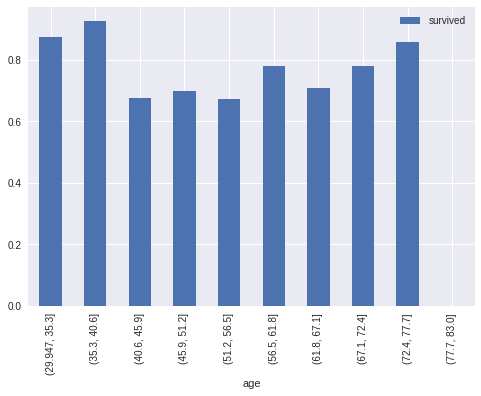

In [37]:
#lookign at simpler pivot tables - 1st age vs survived 
pd.pivot_table(df,values='survived', index=age_bin).plot.bar()

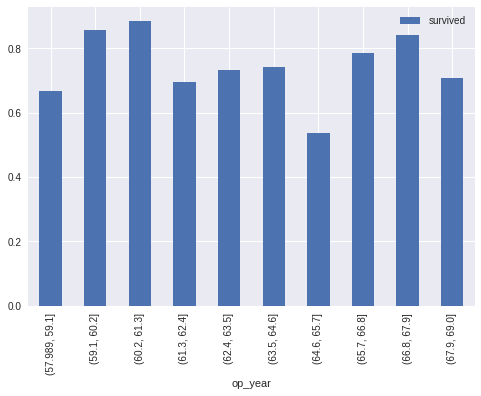

In [38]:
#op yr vs survived - no obvious link
pd.pivot_table(df,values='survived', index=opyr_bin).plot.bar()

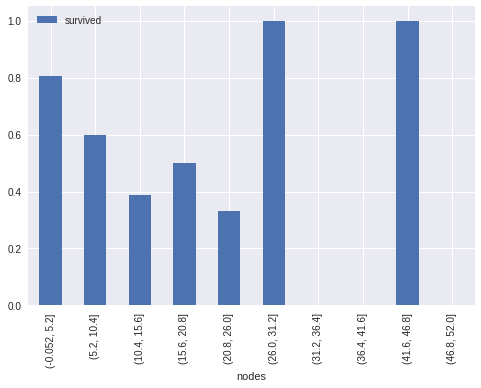

In [39]:
#nodes vs survived
pd.pivot_table(df,values='survived', index=nodes_bin).plot.bar()

In [61]:
nodes_bin.value_counts()

(-0.052, 5.2]    236
(5.2, 10.4]       30
(10.4, 15.6]      18
(20.8, 26.0]       9
(15.6, 20.8]       8
(26.0, 31.2]       2
(46.8, 52.0]       1
(41.6, 46.8]       1
(31.2, 36.4]       1
(36.4, 41.6]       0
Name: nodes, dtype: int64

In [59]:
age_bin.value_counts()[0:10]

(51.2, 56.5]      55
(45.9, 51.2]      53
(40.6, 45.9]      46
(61.8, 67.1]      41
(56.5, 61.8]      41
(35.3, 40.6]      27
(67.1, 72.4]      18
(29.947, 35.3]    16
(72.4, 77.7]       7
(77.7, 83.0]       2
Name: age, dtype: int64

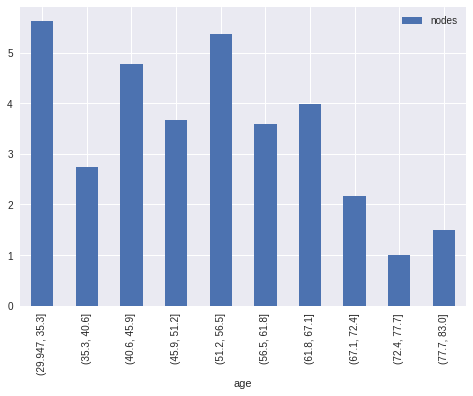

In [62]:
#examining nodes vs age
pd.pivot_table(df,values='nodes', index=age_bin).plot.bar()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

the younger a patient is the more likely they are to survive.  this looks at first glance not to be true as there are a high percentage of patients over 72 who survived.  how ever there is an extremely low number of these cases (just 9) so we can't draw any conclusions on that small amount of data


- What is at least one feature that looks to have a negative relationship with survival?

the more nodes a patient has, the less likely they are to survive.  the data has 4 outliers of patients above 26 nodes all of whom survived which on first inspection seems to counter this conclusion.  however there is not enough data for 26 nodes and above to draw any conclusion.  it may even be withextreme numbers of nodes there were more radical treatments

- How are those two features related with each other, and what might that mean?

the number of nodes seems to peak in the ages 40-60.  this may mean the cancer has gone undetected for longer, meaning a higher chance of more nodes.  this drops off with age, though maybe elder patients with high numbers of ndoes did not receive operations

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.